# Introduction to Python for International and Development Research
## Data Highlights

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import the weekly aggregated data
df_w = pd.read_csv('df_w.csv')

# import the weekly regional data
df_w_region = pd.read_csv('df_w_region.csv')

In [9]:
# Convert the date column to the correct format
# It is key to tell Python that a column is a date as it allows to use date specific commands later.
# Convert the date column to the correct format
# It is key to tell Python that a column is a date as it allows to use date specific commands later.
df_w['Date'] = pd.to_datetime(df_w['Date'], format='%d/%m/%Y')
df_w_region['Date'] = pd.to_datetime(df_w_region['Date'], format='%d/%m/%Y')

In [10]:
# check the content of the aggregated data
df_w.describe(include='all')

,Date,Spending,Surplus
count,208,208.000000,208.000000
mean,2016-01-06 12:00:00,3567.306708,88.708042
min,2014-01-12 00:00:00,14.560000,-1818.523200
25%,2015-01-09 06:00:00,1681.124375,-125.388525
50%,2016-01-06 12:00:00,2831.073500,54.164250
75%,2017-01-02 18:00:00,4636.320250,298.466525
max,2017-12-31 00:00:00,16008.172000,2173.561300
std,NaN,2805.029868,472.042915


In [11]:
# check the content of the regional data
df_w_region.describe(include='all')

,Date,Region,Budget,Surplus
count,677,677,677.000000,677.000000
unique,NaN,4,NaN,NaN
top,NaN,West,NaN,NaN
freq,NaN,188,NaN,NaN
mean,2016-02-17 08:53:53.087149056,NaN,1096.011514,27.254465
min,2014-01-12 00:00:00,NaN,3.984000,-1862.312400
25%,2015-02-15 00:00:00,NaN,256.784000,-42.129400
50%,2016-03-13 00:00:00,NaN,670.943000,18.402400
75%,2017-02-12 00:00:00,NaN,1462.028000,95.794000
max,2017-12-31 00:00:00,NaN,10030.622000,2083.409200


# Example: Bar graph

In [13]:
# Aggregate the sum of 'Surplus' for each region
profit_sum_by_region = df_w_region.groupby('Region')['Surplus'].sum().reset_index()

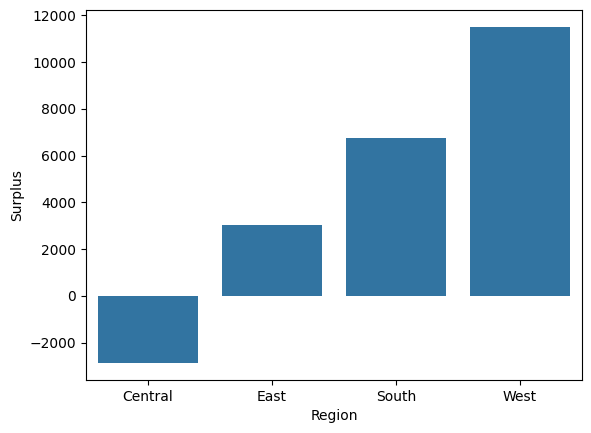

In [14]:
# Create the bar plot

sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus')

plt.show()


<ipython-input-15-5e09c4e5f2bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus', palette=bar_colors)


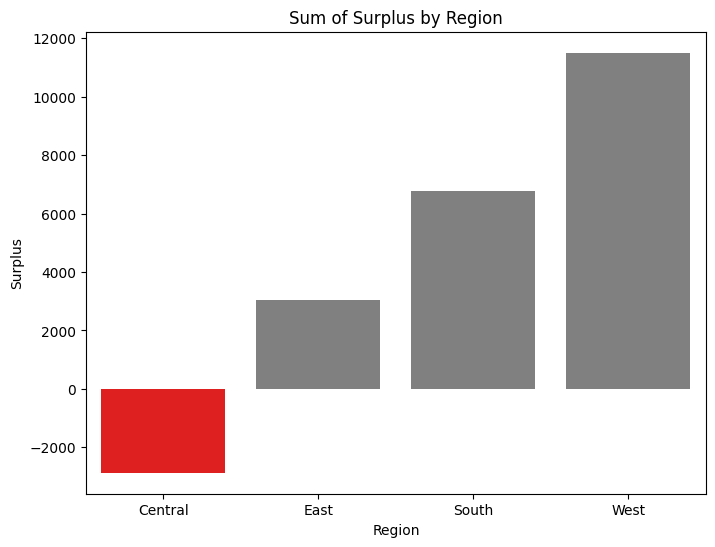

In [15]:
# Define the colors for each bar
bar_colors = ['red' if x == 'Central' else 'grey' for x in profit_sum_by_region['Region']]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus', palette=bar_colors)

plt.title('Sum of Surplus by Region')
plt.xlabel('Region')
plt.ylabel('Surplus')
plt.show()


<ipython-input-17-2e1882375bf7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus', palette=bar_colors)


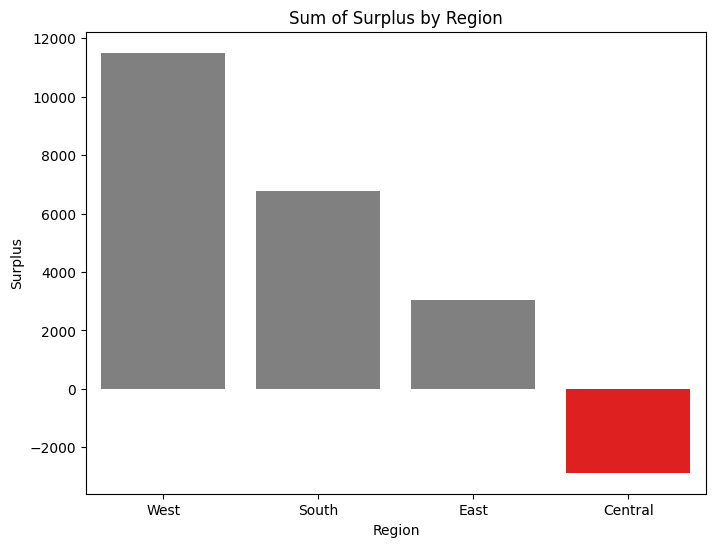

In [17]:
# Sort the data frame in descending order of Profit
profit_sum_by_region = profit_sum_by_region.sort_values('Surplus', ascending=False)

# Define the colors for each bar
bar_colors = ['red' if x == 'Central' else 'grey' for x in profit_sum_by_region['Region']]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus', palette=bar_colors)

plt.title('Sum of Surplus by Region')
plt.xlabel('Region')
plt.ylabel('Surplus')
plt.show()


<ipython-input-18-74c2920d07d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus', palette=bar_colors)


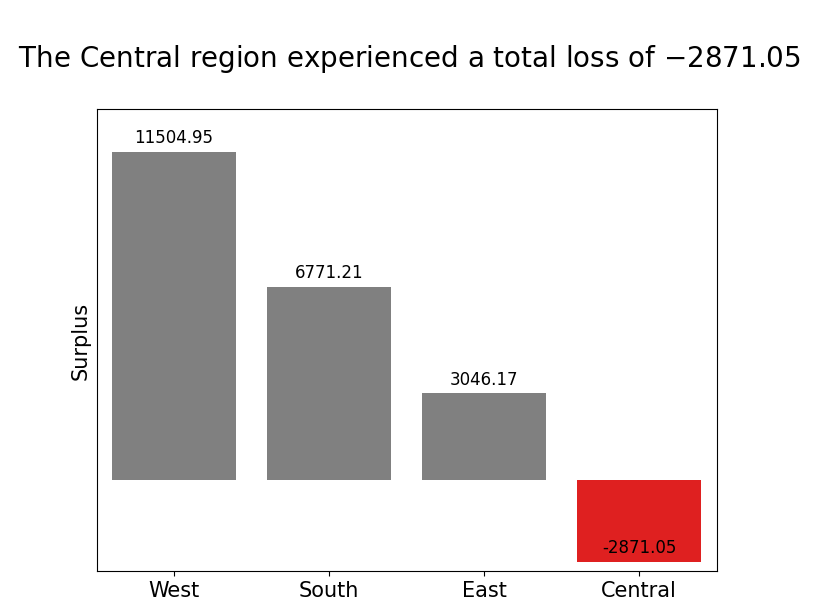

In [18]:
# Adjust font
profit_sum_by_region = profit_sum_by_region.sort_values('Surplus', ascending=False)

# Define the colors for each bar
bar_colors = ['red' if x == 'Central' else 'grey' for x in profit_sum_by_region['Region']]

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=profit_sum_by_region, x='Region', y='Surplus', palette=bar_colors)

# Find the profit (or loss) value for the Central region
central_profit = profit_sum_by_region[profit_sum_by_region['Region'] == 'Central']['Surplus'].iloc[0]

# Create a descriptive title
plt.title(f'\n The Central region experienced a total loss of ${central_profit:.2f}$ \n', fontsize=20)

# Remove Y-axis ticks and labels
ax.set_yticks([])

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
# Set the y-axis range to be between 13000 and -3000
plt.ylim(-3200,13000 )

plt.ylabel('Surplus', fontsize=15)

plt.xticks( fontsize=15)

# No x axis title
plt.xlabel('')
plt.show()


# Example: Spaghetti plot

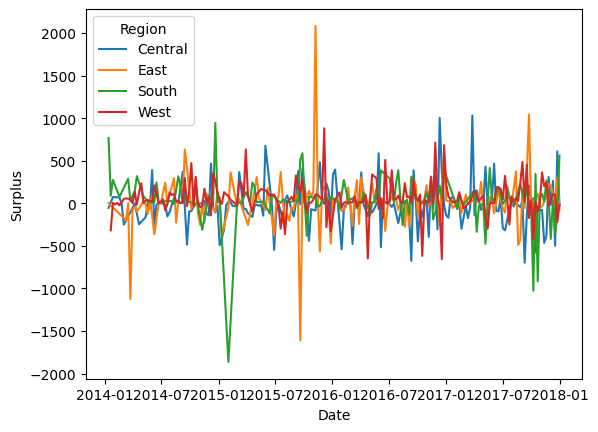

In [19]:
# Basic plot

sns.lineplot(data=df_w_region, x='Date', y='Surplus', hue='Region')
plt.show()

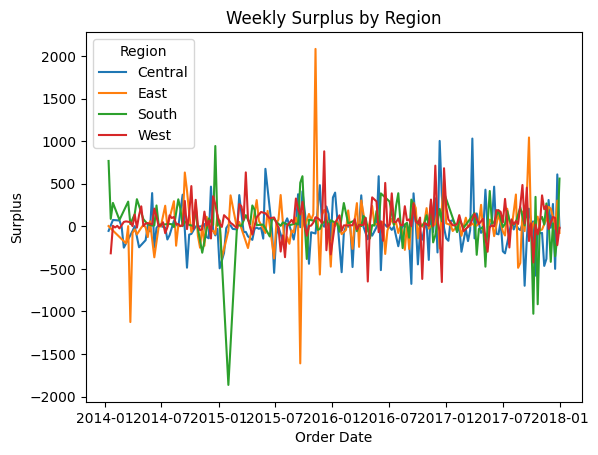

In [21]:
# Clean text
sns.lineplot(data=df_w_region, x='Date', y='Surplus', hue='Region')
plt.title('Weekly Surplus by Region')
plt.xlabel('Order Date')
plt.ylabel('Surplus')
plt.show()

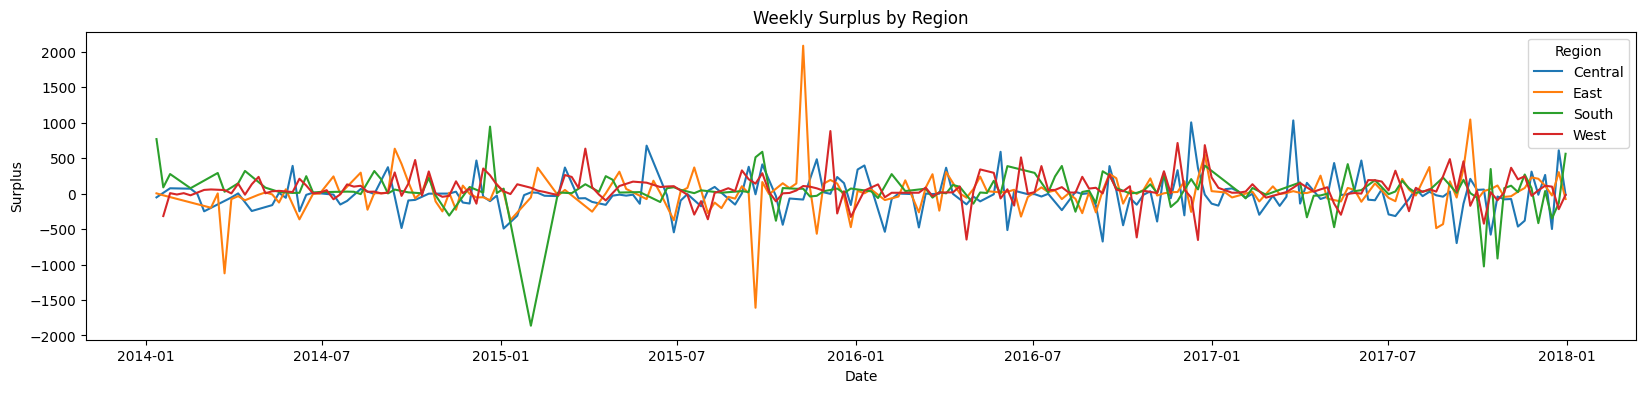

In [22]:
# Adjust The proportion
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_w_region, x='Date', y='Surplus', hue='Region')
plt.title('Weekly Surplus by Region')
plt.xlabel('Date')
plt.ylabel('Surplus')
plt.show()

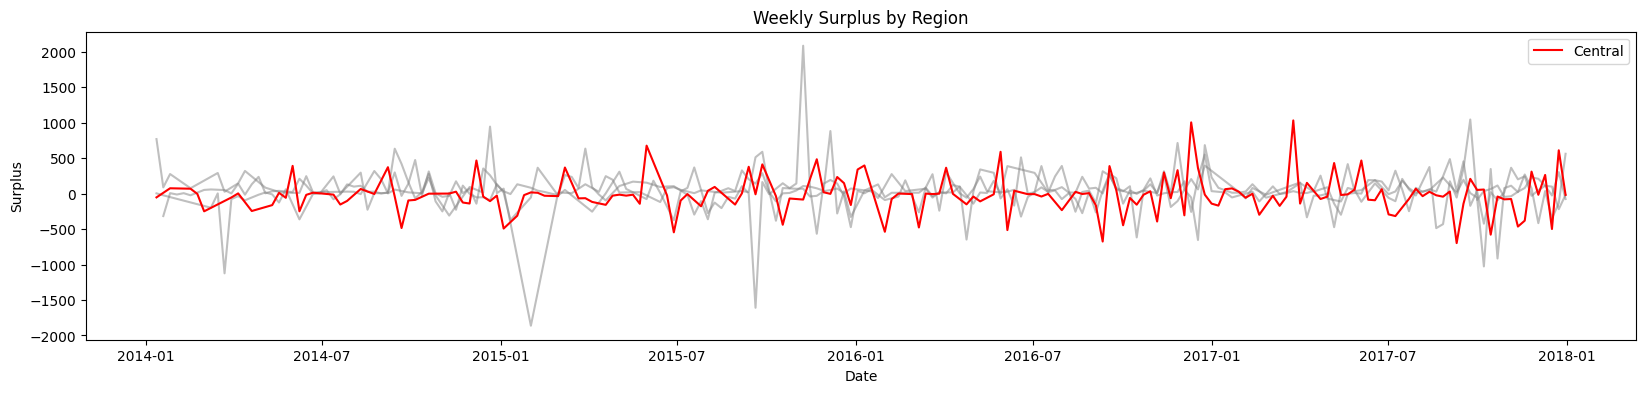

In [23]:
# Adjust the color

plt.figure(figsize=(20, 4))

# Plot all regions in grey with 50% opacity
for region in df_w_region['Region'].unique():
    if region != 'Central':
        sns.lineplot(data=df_w_region[df_w_region['Region'] == region],
                     x='Date', y='Surplus', color='grey', alpha=0.5, label='_nolegend_')

# Highlight Central region in red
sns.lineplot(data=df_w_region[df_w_region['Region'] == 'Central'],
             x='Date', y='Surplus', color='red', label='Central')

plt.title('Weekly Surplus by Region')
plt.xlabel('Date')
plt.ylabel('Surplus')
plt.legend()
plt.show()

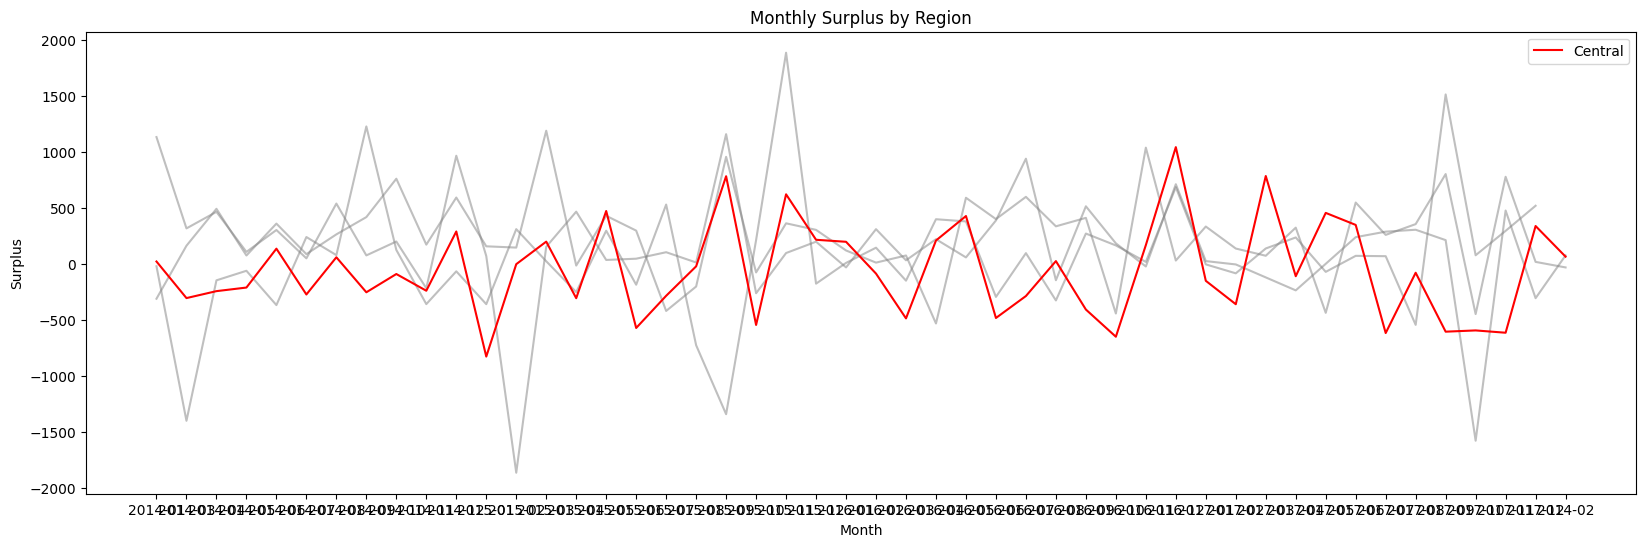

In [24]:
# Reduce the noise

# Extract month from 'Order Date' and convert to string for plotting
df_w_region['Month'] = df_w_region['Date'].dt.to_period('M').astype(str)

# Group by 'Region' and 'Month', Aggregate 'Profit'
monthly_data = df_w_region.groupby(['Region', 'Month']).agg({'Surplus': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(20, 6))

# Plot all regions in grey with 50% opacity
for region in monthly_data['Region'].unique():
    if region != 'Central':
        sns.lineplot(data=monthly_data[monthly_data['Region'] == region],
                     x='Month', y='Surplus', color='grey', alpha=0.5, label='_nolegend_')

# Highlight Central region in red
sns.lineplot(data=monthly_data[monthly_data['Region'] == 'Central'],
             x='Month', y='Surplus', color='red', label='Central')

plt.title('Monthly Surplus by Region')
plt.xlabel('Month')
plt.ylabel('Surplus')

plt.legend()
plt.show()

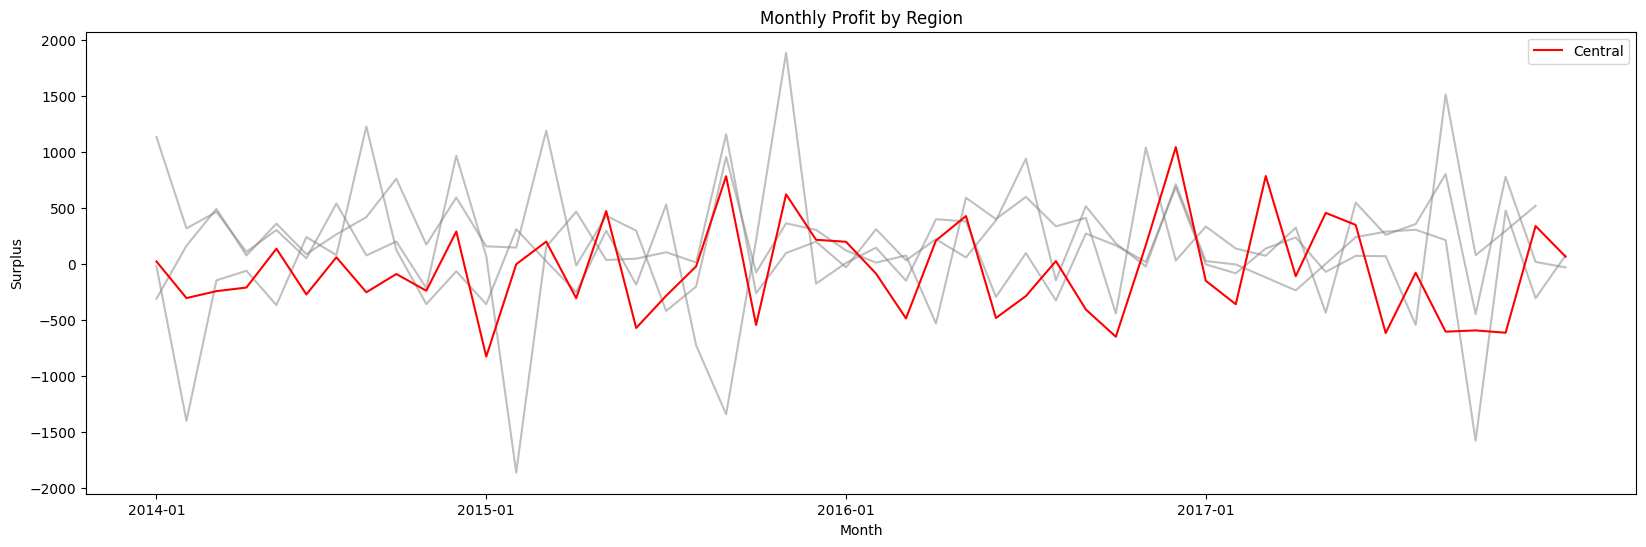

In [25]:
# Correct the labels
# Plotting
plt.figure(figsize=(20, 6))

# Plot all regions in grey with 50% opacity
for region in monthly_data['Region'].unique():
    if region != 'Central':
        sns.lineplot(data=monthly_data[monthly_data['Region'] == region],
                     x='Month', y='Surplus', color='grey', alpha=0.5, label='_nolegend_')

# Highlight Central region in red
sns.lineplot(data=monthly_data[monthly_data['Region'] == 'Central'],
             x='Month', y='Surplus', color='red', label='Central')

# Adjust x-axis ticks
ax = plt.gca()  # Get current axis
unique_months = monthly_data['Month'].unique()
ax.set_xticks(unique_months[::12])  # Set ticks to every 3rd month

plt.title('Monthly Surplus by Region')
plt.xlabel('Month')
plt.ylabel('Surplus')
plt.legend()
plt.show()

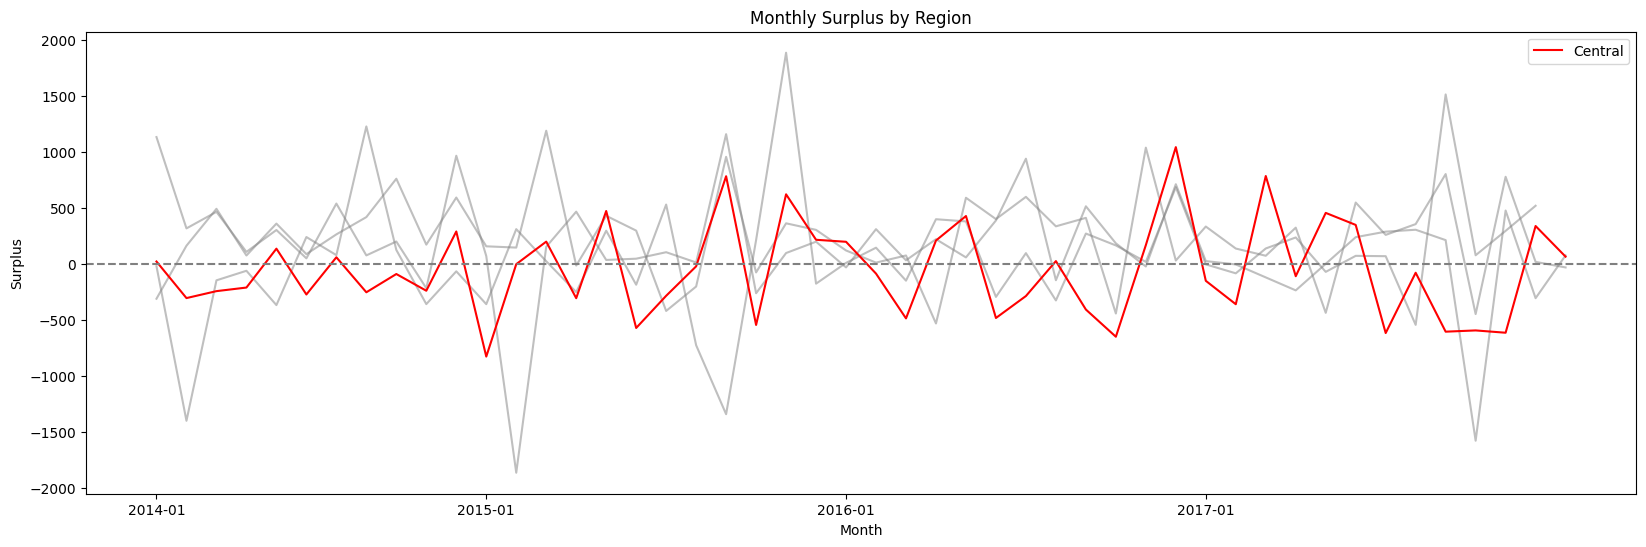

In [26]:
# Correct the labels
# Plotting
plt.figure(figsize=(20, 6))

# Plot all regions in grey with 50% opacity
for region in monthly_data['Region'].unique():
    if region != 'Central':
        sns.lineplot(data=monthly_data[monthly_data['Region'] == region],
                     x='Month', y='Surplus', color='grey', alpha=0.5, label='_nolegend_')

# Highlight Central region in red
sns.lineplot(data=monthly_data[monthly_data['Region'] == 'Central'],
             x='Month', y='Surplus', color='red', label='Central')

# Adjust x-axis ticks
ax = plt.gca()  # Get current axis
unique_months = monthly_data['Month'].unique()
ax.set_xticks(unique_months[::12])  # Set ticks to every 3rd month

# Add a horizontal dashed grey line at Surplus = 0
plt.axhline(0, color='grey', linestyle='--')

plt.title('Monthly Surplus by Region')
plt.xlabel('Month')
plt.ylabel('Surplus')
plt.legend()
plt.show()

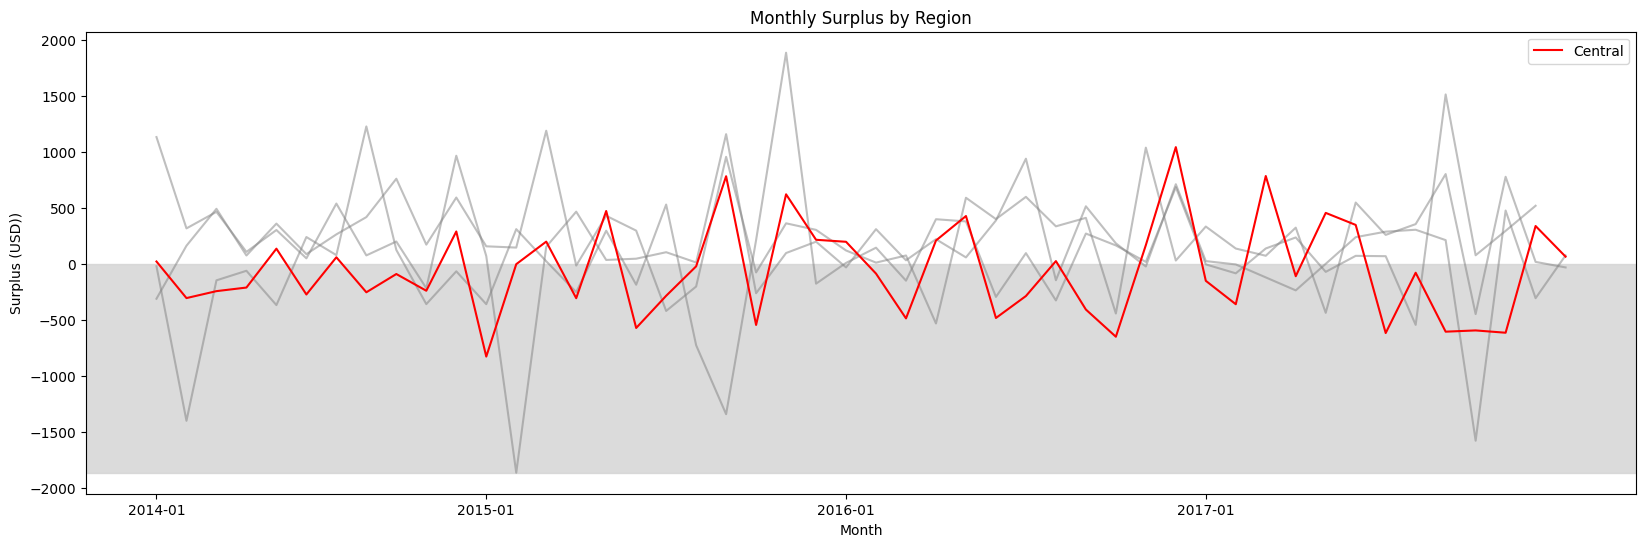

In [27]:
# Correct the labels
# Plotting
plt.figure(figsize=(20, 6))



# Plot all regions in grey with 50% opacity
for region in monthly_data['Region'].unique():
    if region != 'Central':
        sns.lineplot(data=monthly_data[monthly_data['Region'] == region],
                     x='Month', y='Surplus', color='grey', alpha=0.5, label='_nolegend_')

# Highlight Central region in red
sns.lineplot(data=monthly_data[monthly_data['Region'] == 'Central'],
             x='Month', y='Surplus', color='red', label='Central')

# Adjust x-axis ticks
ax = plt.gca()  # Get current axis
unique_months = monthly_data['Month'].unique()
ax.set_xticks(unique_months[::12])  # Set ticks to every 3rd month

# Get minimum Profit value for setting the lower limit of the shaded area
min_profit = min(monthly_data['Surplus'])

# Create a light grey background for the loss region
plt.axhspan(min_profit, 0, color='lightgrey', alpha=0.8)

plt.title('Monthly Surplus by Region')
plt.ylabel('Surplus (USD))')
plt.legend()
plt.show()

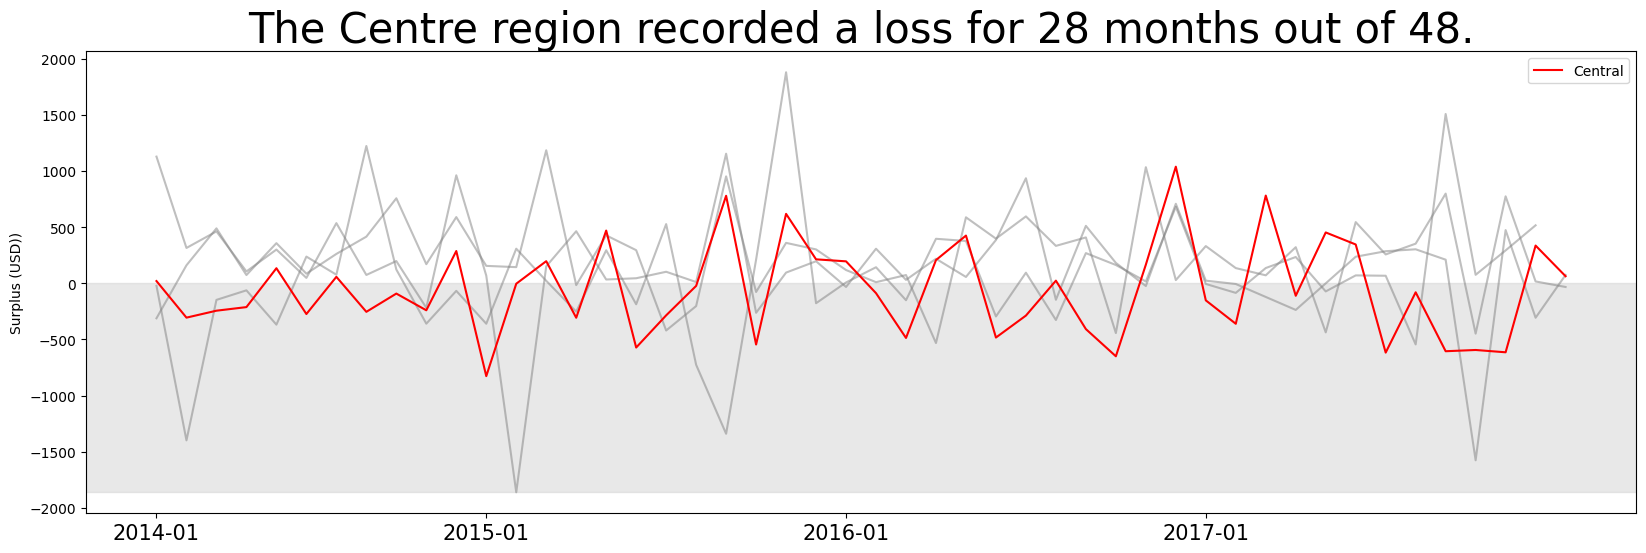

In [28]:
# Specific title
# Plotting
plt.figure(figsize=(20, 6))

# Filter data for the 'Central' region and count the months with a loss
central_data = monthly_data[monthly_data['Region'] == 'Central']
loss_months_count = central_data[central_data['Surplus'] < 0].shape[0]
total_months_count = central_data.shape[0]


# Plot all regions in grey with 50% opacity
for region in monthly_data['Region'].unique():
    if region != 'Central':
        sns.lineplot(data=monthly_data[monthly_data['Region'] == region],
                     x='Month', y='Surplus', color='grey', alpha=0.5, label='_nolegend_')

# Highlight Central region in red
sns.lineplot(data=monthly_data[monthly_data['Region'] == 'Central'],
             x='Month', y='Surplus', color='red', label='Central')

# Adjust x-axis ticks
ax = plt.gca()  # Get current axis
unique_months = monthly_data['Month'].unique()
ax.set_xticks(unique_months[::12])  # Set ticks to every 3rd month

# Get minimum Profit value for setting the lower limit of the shaded area
min_profit = min(monthly_data['Surplus'])

# Create a light grey background for the loss region
plt.axhspan(min_profit, 0, color='lightgrey', alpha=0.5)

plt.title(f"The Centre region recorded a loss for {loss_months_count} months out of {total_months_count}.", fontsize=30)
plt.ylabel('Surplus (USD))')
plt.xlabel('')
plt.xticks( fontsize=15)
plt.legend()
plt.show()